In [20]:
import numpy as np
import pandas as pd
pd.set_option("display.date_dayfirst", True)
pd.set_option("display.date_yearfirst", False)
#pd.describe_option('display.date_yearfirst')
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.mlab as mlab

import matplotlib.pylab as pylab

import os
cwd = os.getcwd()

#Import excel file into pandas dataframe

In [31]:
#mainpath = 'C:/Users/mb22/OneDrive/PhD/Quasar Shared/'
#filepath = 'Data/NPL_Table_All.xlsx'
filepath = 'Data to Import/All_Ext_OPs-Jan-Jun2015 - ANON15Dec15.xlsx'

#fullpath=mainpath+filepath
fullpath=cwd+'/'+filepath # use if need to specify full path for some reason.
print(fullpath) #note forward and backward slashes in output

all_data = pd.read_excel(filepath, parse_dates=['Date'])
#all_data.tail(2)
all_data.describe()

C:\Users\mb22\OneDrive\PhD\Quasar Shared\Modelling\IPython/Data to Import/All_Ext_OPs-Jan-Jun2015 - ANON15Dec15.xlsx


,Centre_ID,Group,Linac_ID,OP_Dif
count,16335.000000,16335.000000,16335.000000,16330.000000
mean,11.379369,3.928558,66.213284,-0.068509
std,7.150579,2.064848,38.391579,3.852052
min,1.000000,1.000000,1.000000,-147.646242
25%,6.000000,2.000000,33.000000,-0.629396
50%,11.000000,4.000000,67.000000,0.000000
75%,18.000000,6.000000,99.000000,0.550000
max,26.000000,8.000000,133.000000,272.051282


##Remove Unwanted Dates & Outliers

In [32]:
cutoff_perc = 5
all_data = all_data[(all_data.OP_Dif >-cutoff_perc) & (all_data.OP_Dif < cutoff_perc) & (all_data.Date < "01/July/2015")]
all_data.describe()


,Centre_ID,Group,Linac_ID,OP_Dif
count,16170.000000,16170.000000,16170.000000,16170.000000
mean,11.299258,3.900247,65.710761,-0.045771
std,7.122063,2.043229,38.137384,0.886552
min,1.000000,1.000000,1.000000,-4.380000
25%,6.000000,2.000000,33.000000,-0.637980
50%,11.000000,4.000000,66.000000,0.000000
75%,18.000000,6.000000,99.000000,0.540000
max,26.000000,8.000000,133.000000,3.300000


#Calculate some stats & check data types

In [33]:
mean = np.mean(all_data['OP_Dif'])
sd = np.std(all_data['OP_Dif'])
all_data.describe()
#all_data.dtypes

#all_data.groupby(['Type'])['Energy'].nunique().reset_index() # number of unique dates = number of visits

,Centre_ID,Group,Linac_ID,OP_Dif
count,16170.000000,16170.000000,16170.000000,16170.000000
mean,11.299258,3.900247,65.710761,-0.045771
std,7.122063,2.043229,38.137384,0.886552
min,1.000000,1.000000,1.000000,-4.380000
25%,6.000000,2.000000,33.000000,-0.637980
50%,11.000000,4.000000,66.000000,0.000000
75%,18.000000,6.000000,99.000000,0.540000
max,26.000000,8.000000,133.000000,3.300000


#Make some quick graphs

### Plot of each centres distribution

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0EFCFC10>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0ED71330>]], dtype=object)

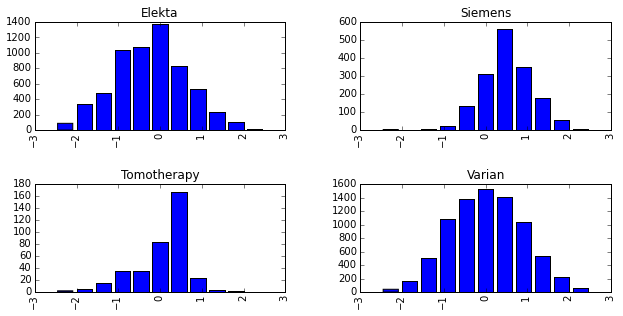

In [34]:
from decimal import * # decimal means that more exact maths can be done with a specified precision.
getcontext().prec = 28
range_lower = Decimal('-2.5')
range_upper = Decimal('2.5')
bin_width = Decimal('0.005')
number_bins = (range_upper-range_lower)/bin_width + 1

## Linac Manufacturer
all_data['OP_Dif'].hist(by=all_data['Linac_Manufacturer'], normed=False, bins=11, range=(-2.5,2.5), rwidth=0.8)
#plt.savefig('OPs/All_Hist_Manufacturer.png', bbox_inches='tight', dpi=300)

## Linac Model
#all_data['OP_Dif'].hist(by=all_data['Linac_Model'], normed=False, bins=11, range=(-2.5,2.5), rwidth=0.8)
#plt.savefig('OPs/All_Hist_Model.png', bbox_inches='tight', dpi=300)

## Centre
#all_data['OP_Dif'].hist(by=all_data['Centre_ID'], normed=False, bins=11, range=(-2.5,2.5), rwidth=0.8)
#plt.savefig('OPs/All_Hist_Centre.png', bbox_inches='tight', dpi=300)

## Region
#all_data['OP_Dif'].hist(by=all_data['Group'], normed=False, bins=11, range=(-2.5,2.5), rwidth=0.8)
#plt.savefig('OPs/All_Hist_Region.png', bbox_inches='tight', dpi=300)

## All Data
#all_data['OP_Dif'].hist(normed=False, bins=21, range=(-3,3), rwidth=1)
#plt.savefig('OPs/All_Hist.png', bbox_inches='tight', dpi=300)



#Histograms

##Ideally make into a function and feed data frame, title, filename

#Get some more stats such as Mean, SD, Skew etc.

In [35]:
from scipy import stats

print('Skew: ', all_data['OP_Dif'].skew())
print('SEM: ', all_data['OP_Dif'].sem())
print('Mean: ', all_data['OP_Dif'].mean())
print('SD: ', all_data['OP_Dif'].std()) # Need to remove outliers for useful stats
print('Kurtosis: ', all_data['OP_Dif'].kurtosis())
print('stats.kurtosis: ', stats.kurtosis(all_data['OP_Dif'], axis=0, fisher=False, bias=False))
print('Max: ', all_data['OP_Dif'].max())
print('Min: ', all_data['OP_Dif'].min())

print('Skew Test: ', stats.skewtest(all_data['OP_Dif']))
print('Kurtosis Test: ', stats.kurtosistest(all_data['OP_Dif']))
print('Norm Test: ', stats.normaltest(all_data['OP_Dif']))


Skew:  -0.147173567724
SEM:  0.00697186868501
Mean:  -0.0457705073654
SD:  0.886551989101
Kurtosis:  0.178760456669
stats.kurtosis:  3.178760456668656
Max:  3.3
Min:  -4.38
Skew Test:  (-7.6023788647910902, 2.9073608078970407e-14)
Kurtosis Test:  (4.287002095471804, 1.8110058559847822e-05)
Norm Test:  (76.1745513704019, 2.8767779361869949e-17)


###Non-normal?
The tests for normality have p values which indicate the resutls are non-normal. 
This is liekly due tot he large amounts of data, which can cause even very small deviations from normality to be statistically different from normal.

I think in our case, if required the distributions can be considered as normal (e.g. if want to calcualte how many centres are outside a given range)

#Plot of All Audits

In [36]:
# Calculate rolling SD of 20 values

all_data_datesort = all_data.sort(['Date'], ascending=True)

all_data_datesort['SD_Prev1000'] = np.nan
all_data_datesort['SD_Prev1000'] = pd.rolling_std(all_data_datesort['OP_Dif'],window=1000)
all_data_datesort['Mean_Prev1000'] = pd.rolling_mean(all_data_datesort['OP_Dif'],window=1000)

all_data_datesort.tail(3)


,Centre_ID,Group,Linac_Manufacturer,Linac_Model,Linac_Install_Date,Linac_ID,Date,Measurement_Device,OP_Dif,Recording,Comments,SD_Prev1000,Mean_Prev1000
2293,2,6,Varian,2100CD,NaN,17,2015-06-30 15:34:12,Linacheck,1.000000,Database,Daily Results Given,0.890308,0.157449
2014,2,6,Varian,2100CD,NaN,15,2015-06-30 15:43:42,Linacheck,-0.400000,Database,Daily Results Given,0.890456,0.156676
1185,2,6,Varian,2100CD,NaN,10,2015-06-30 19:08:38,Farmer Chamber in Water,-0.781194,Database,NaN,0.890927,0.155939


###To do with OPs

- Loop through each linac and calc mean & SD for outputs.
	- SD will give indication of measurement variability
	- Can plot spread of means = variation present depending on linac which treated on.
	- Output table (array) of linac ID, mean, SD
- Loop through each centre - done by using 'groupby'
    - Mean + SD for each centre

## Centre grouping

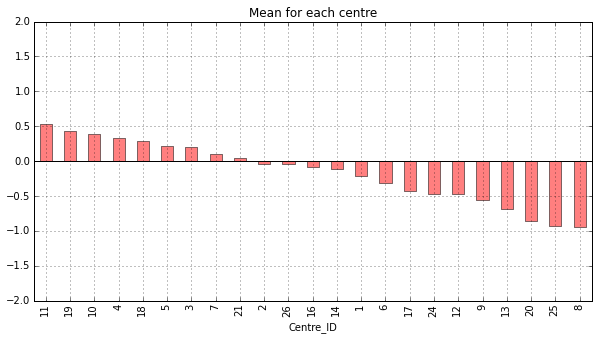

In [37]:
m = all_data_datesort[(all_data_datesort.OP_Dif >-5) & (all_data_datesort.OP_Dif < 5)] # remove outliers

#m = all_data_datesort
g = m.groupby('Centre_ID')
gmean = g.mean()
gmean = gmean.sort(['OP_Dif'], ascending=False)
gsd=g.std()
gsdneg=-gsd
gsdnorm=gmean+gsd # to ensure SD is centred around mean
gsdnegnorm=gmean-gsd

myplot = gmean['OP_Dif'].plot(kind='bar', color='red', alpha = 0.5)
#myplot = gsdnorm['OP_Dif'].plot(kind='bar', color='blue', alpha = 0.5) # SD but best to do a box plot?
#myplot = gsdnegnorm['OP_Dif'].plot(kind='bar', color='blue', alpha = 0.5)
plt.axhline(0, color='black')

plt.ylim(-2,2)
plt.title("Mean for each centre")

#plt.savefig('OPs/All_Means-bar-corr.png', bbox_inches='tight', dpi=300)

##Linac Grouping

Mean Max: 1.53699386503
Mean Min: -2.09007092199
Mean Range: 3.62706478702


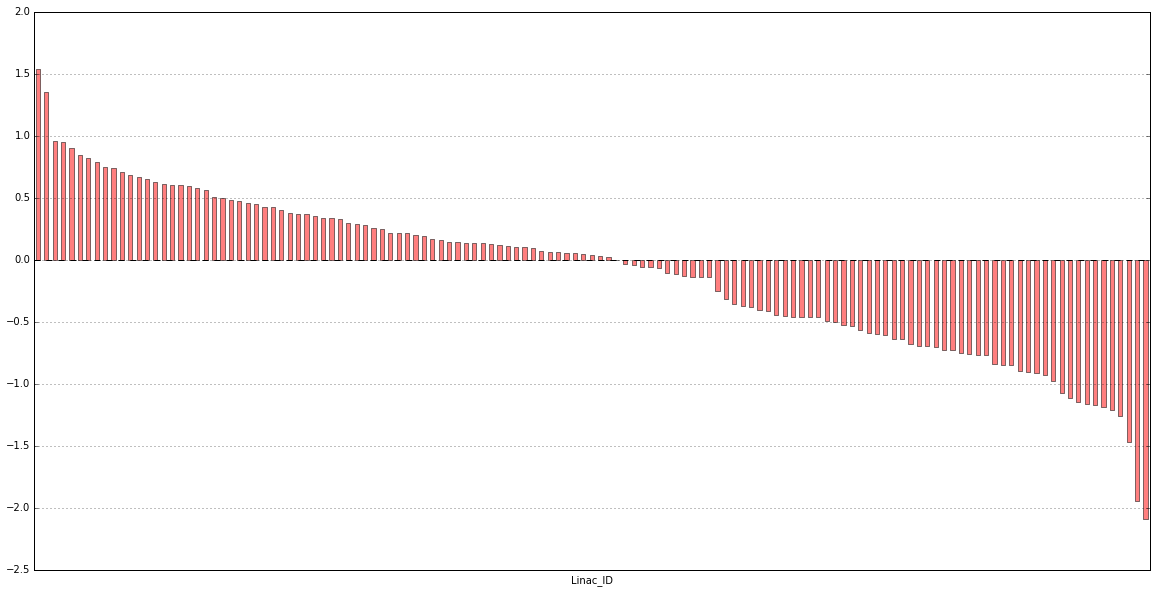

In [393]:
plt.figure(figsize=(20,10))
#plt.rcParams.update({'font.size': 22})
l = m.groupby('Linac_ID')
## calc mean for each linac
lmean = l.mean()
## sort into order
lmean = lmean.sort(['OP_Dif'], ascending=False)
lsd=l.std()
lsd = lsd.sort(['OP_Dif'], ascending=False)
lsdneg=-lsd
lsdnorm=lmean+lsd # to ensure SD is centred around mean
lsdnegnorm=lmean-lsd
myplotlinac = lmean['OP_Dif'].plot(kind='bar', color='red', alpha = 0.5)
#myplotlinac = lsd['OP_Dif'].plot(kind='bar', color='red', alpha = 0.5)

myplotlinac.axes.get_xaxis().set_ticks([])

mean_max = max(lmean['OP_Dif'])
mean_min = min(lmean['OP_Dif'])
mean_range = mean_max - mean_min
print('Mean Max: ' + str(mean_max))
print('Mean Min: ' + str(mean_min))
print('Mean Range: ' + str(mean_range))

#print(lsd.mean())

#plt.savefig('OPs/All_Linacs_Means-bar-corr-large_text.png', bbox_inches='tight', dpi=300)

Mean: -0.0457705073654
SD: 0.886551989101


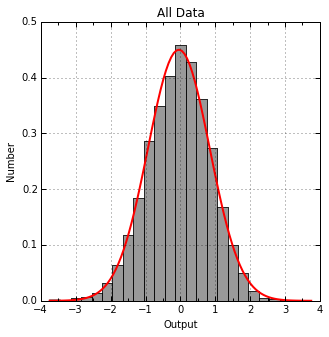

In [60]:
pylab.rcParams['figure.figsize'] = 5, 5 # change size of figures

from matplotlib.ticker import AutoMinorLocator

fig = plt.figure()
axes = fig.add_subplot(1,1,1)
plt.title('All Data')
plt.xlabel("Output")
plt.ylabel("Number")
#plt.xlim(-3.2, +3.2)
#plt.ylim(0, 60)

m['OP_Dif'].hist(bins=25, range=(-3.75, 3.75), normed=True,
                               facecolor = 'grey', alpha = 0.8, ax=axes, rwidth=1)

axes.xaxis.set_minor_locator(AutoMinorLocator(2)) #used to set the number of minor ticks between major ticks
plt.tick_params(which='major', width=1, length=5)
plt.tick_params(which='minor', width=1, length=3)
plt.grid(True, which='major')

mean = m['OP_Dif'].mean()
sd = m['OP_Dif'].std() # need to exclude outliers for this to be a useful calculation.

x = np.linspace(-3.75, 3.75, 100) # add normal distibution fit
plt.plot(x, mlab.normpdf(x,mean,sd), linewidth = 2, color='red')

print('Mean: ' + str(mean))
print('SD: ' + str(sd))

#plt.savefig('OPs/All_Hist.png', bbox_inches='tight', dpi=300)

##Want to change the colour for a centre to make it clearer? Loop through each and give a colour? or create seperate sets fo data to plot?

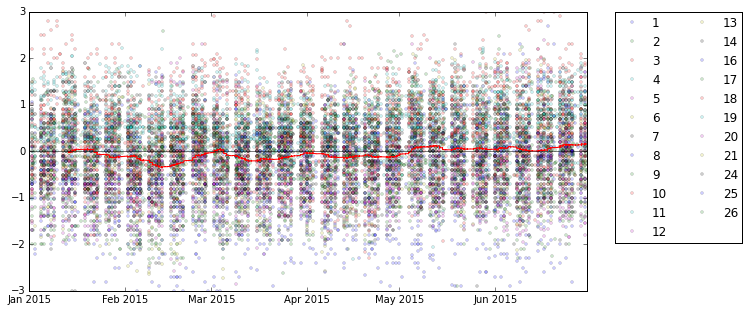

In [58]:
m = all_data_datesort[(all_data_datesort.OP_Dif >-5) & (all_data_datesort.OP_Dif < 5) & (all_data_datesort.Date < "01/July/2015")] # remove outliers
pylab.rcParams['figure.figsize'] = 10, 5 # change size of figures
#fig1 = plt.figure()
#axes1 = fig1.add_subplot(1,1,1)
#plt.title('Machine Output Variation')
#plt.xlabel("Date")
#plt.ylabel("Measured Output")
#plt.ylim(-4, 4)
#axes1.xaxis.set_minor_locator(AutoMinorLocator(4)) #used to set the number of minor ticks between major ticks
#plt.tick_params(which='major', width=1, length=5)
#plt.tick_params(which='minor', width=1, length=3)
#plt.grid(True, which='major')

#print(max(m['Centre_ID']))
#m.values
#mark_colors = np.array(m['Centre_ID'])
#print(mark_colors)

#x=np.arange(1,m['OP_Dif'].count()+1)
x=m['Date']
y=m['OP_Dif']

##This just plots all as the same colour
#plt.plot_date(x, y, alpha=0.4, color='b')
#yerr=(m['OPError']*m['OPRatio'])/100

##The below plots each centre as a different colour
df = pd.DataFrame(dict(x=m['Date'],y=m['OP_Dif'],label=m['Centre_ID']))
#df = pd.DataFrame(dict(x=m['Date'],y=m['OP_Dif'],label=m['Linac_ID']))

groups = df.groupby('label')

fig, ax = plt.subplots()
for name, group in groups:
    ax.plot_date(group.x,group.y,label=name, alpha=0.2, ms=3)
#ax.legend(loc='best')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., numpoints=1, ncol=2)
plt.ylim(-3,3)
#plt.show()

ysd=m['SD_Prev1000']
ymean=all_data_datesort['Mean_Prev1000']
#ax.plot(x,ysd, label='SD')
ax.plot(x,ymean, label='Mean')
ax.axhline(0,color='black', alpha=0.5)
#ax.fill_between(x, ymean)
#ax.fill_between(t, mu1+sigma1, mu1-sigma1, facecolor='blue', alpha=0.5)
#ax.legend()
#plt.ylim(0.5,1.5)

#plt.savefig('OPs/All_date_scatter_group_by_centre.png', bbox_inches='tight', dpi=300)

### Some analysis for different linac models/measurement equipment etc

In [68]:
m.tail(1)

,Centre_ID,Group,Linac_Manufacturer,Linac_Model,Linac_Install_Date,Linac_ID,Date,Measurement_Device,OP_Dif,Recording,Comments,SD_Prev1000,Mean_Prev1000
1185,2,6,Varian,2100CD,NaN,10,2015-06-30 19:08:38,Farmer Chamber in Water,-0.781194,Database,NaN,0.890927,0.155939


### Linac Manufacturer

Mean Max: 0.497254168762
Mean Min: -0.278581158399
Mean Range: 0.77583532716


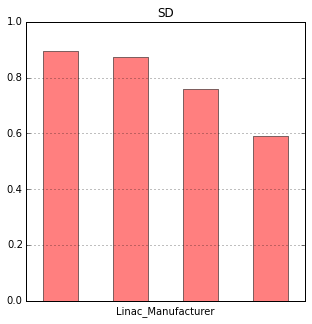

In [174]:
l = m.groupby(m['Linac_Manufacturer'])
## calc mean for each linac
lmean = l.mean()
## sort into order
lmean = lmean.sort(['OP_Dif'], ascending=False)
lsd=l.std()
lsd = lsd.sort(['OP_Dif'], ascending=False)
lsdneg=-lsd
lsdnorm=lmean+lsd # to ensure SD is centred around mean
lsdnegnorm=lmean-lsd
#myplotlinac = lmean['OP_Dif'].plot(kind='bar', color='red', alpha = 0.5)
myplotlinac = lsd['OP_Dif'].plot(kind='bar', color='red', alpha = 0.5)
plt.title('SD')
plt.ylim(0,1)

myplotlinac.axes.get_xaxis().set_ticks([])

mean_max = max(lmean['OP_Dif'])
mean_min = min(lmean['OP_Dif'])
mean_range = mean_max - mean_min
print('Mean Max: ' + str(mean_max))
print('Mean Min: ' + str(mean_min))
print('Mean Range: ' + str(mean_range))

#print(lsd.mean())

#plt.savefig('OPs/All_Linacs_Means-bar-corr-large_text.png', bbox_inches='tight', dpi=300)

In [157]:
all_data['Linac_Manufacturer'].unique() ## Names of linac manufacturers

array(['Elekta', 'Tomotherapy', 'Siemens', 'Varian'], dtype=object)

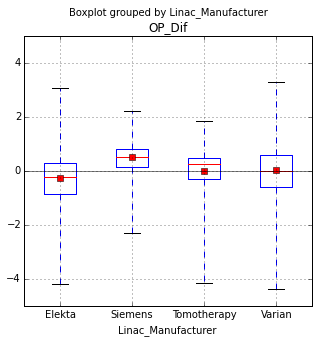

In [173]:
l_man = m
l_man_box = l_man.boxplot(column=['OP_Dif'],by='Linac_Manufacturer', whis='range', showmeans='True')
l_man_box.set_ylim(-5,5)
l_man_box.axhline(0, alpha = 0.5, color = 'black')
#plt.show()


###Measurement Device

###Farmer vs Other

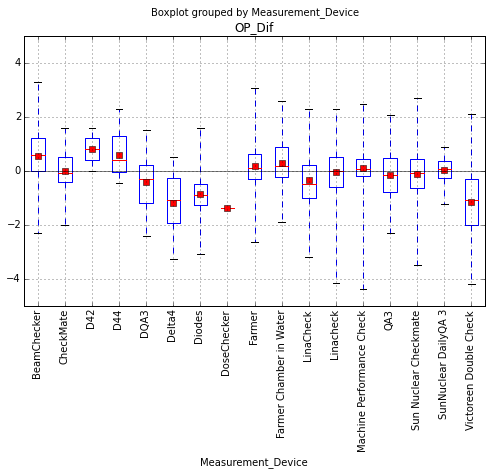

In [207]:
equip = m
equip_box = equip.boxplot(column=['OP_Dif'],by='Measurement_Device', whis='range', showmeans='True', rot=90, figsize=(8,5))
equip_box.set_ylim(-5,5)
equip_box.axhline(0, alpha = 0.5, color = 'black')
#plt.show()

# Note that D44 is a DoseChecker

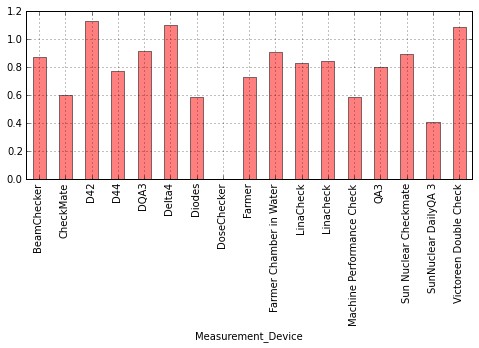

In [204]:
equip_group = m.groupby(m['Measurement_Device'])
## calc mean for each linac
equip_mean = equip_group.mean()
equip_sd = equip_group.std()

myplotequip = equip_sd['OP_Dif'].plot(kind='bar', color='red', alpha = 0.5, figsize=(8,3))

### Are Farmers better?

An intial look doesnt indicate any clear difference between the consistency of Farmer or other measurement devices.
Tehre is also no differnce seen between manufacturers.

## Age of Linac

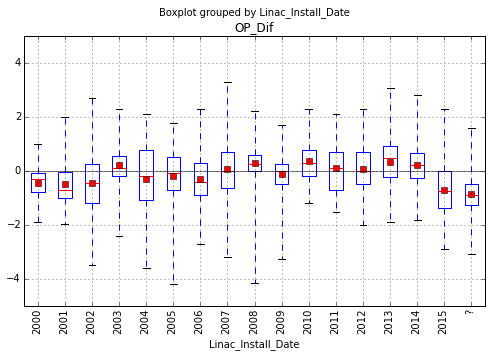

In [239]:
age = m
age_box = equip.boxplot(column=['OP_Dif'],by='Linac_Install_Date', whis='range', showmeans='True', rot=90, figsize=(8,5))
age_box.set_ylim(-5,5)
age_box.axhline(0, alpha = 0.5, color = 'black')
#plt.show()

# Note that D44 is a DoseChecker

No obvious trend seen with age of linac.
In reality, you would have to know how often they require recalibrating to know this, which would be very difficult to guage form a 6 month set of data.

## Apply Gamma Values to plots
Allow determination of variation in outcomes

Mean Mean: -0.101059113692
Mean Max: 1.53699386503
Mean Min: -2.09007092199
Mean Range: 3.62706478702

Mean Median: 0.0373484848485
Mean 95th Percentile: 0.823412698413
Mean 5th Percentile: -1.16658236425
Percentile Range: 1.98999506267


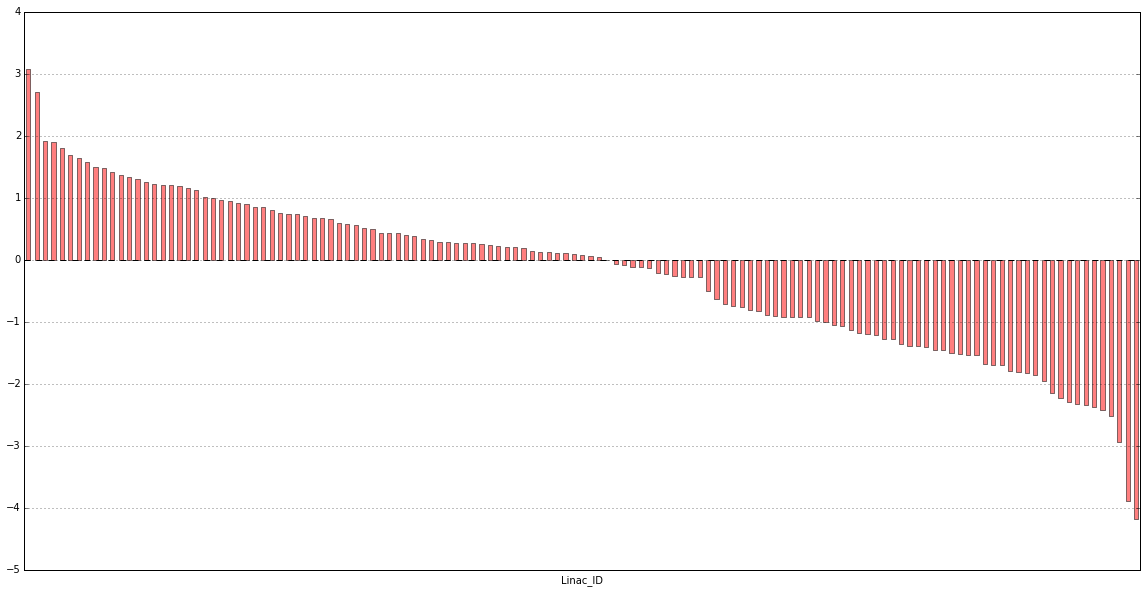

In [337]:
gamma = 2.0 ## (Bentzen used 2.3 for Tumour control, 5.2 for mild/moderate reactions, 0.9 for severe reactions)

plt.figure(figsize=(20,10))
#plt.rcParams.update({'font.size': 22})
l = m.groupby('Linac_ID')
## calc mean for each linac
lmean = l.mean()

## add an extra column with the OP multiplied by gamma value

lmean['Outcome'] = np.nan
lmean['Outcome'] = (lmean['OP_Dif']*gamma)

## sort into order
lmean = lmean.sort(['OP_Dif'], ascending=False)
lmean_gamma = lmean_gamma.sort(['OP_Dif'], ascending=False)
lsd=l.std()
lsd = lsd.sort(['OP_Dif'], ascending=False)
lsdneg=-lsd
lsdnorm=lmean+lsd # to ensure SD is centred around mean
lsdnegnorm=lmean-lsd
#myplotlinac = lmean['OP_Dif'].plot(kind='bar', color='red', alpha = 0.5)
#myplotlinac = lsd['OP_Dif'].plot(kind='bar', color='red', alpha = 0.5)
myplotlinac = lmean['Outcome'].plot(kind='bar', color='red', alpha = 0.5)

myplotlinac.axes.get_xaxis().set_ticks([])

stats_for = lmean['OP_Dif']

mean_mean = stats_for.mean()
mean_max = max(stats_for)
mean_min = min(stats_for)
mean_range = mean_max - mean_min

print('Mean Mean: ' + str(mean_mean))
print('Mean Max: ' + str(mean_max))
print('Mean Min: ' + str(mean_min))
print('Mean Range: ' + str(mean_range))

mean_med = np.median(stats_for)
mean_95 = np.percentile(stats_for, 95, interpolation='higher')
mean_05 = np.percentile(stats_for, 5, interpolation='lower')
mean_perc_range = mean_95-mean_05

print()
print('Mean Median: ' + str(mean_med))
print('Mean 95th Percentile: ' + str(mean_95))
print('Mean 5th Percentile: ' + str(mean_05))
print('Percentile Range: ' + str(mean_perc_range))

(-3, 3)

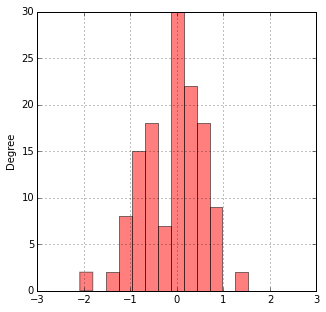

In [742]:
myplotlinac = lmean['OP_Dif'].plot(kind='hist', bins=13, color='red', alpha = 0.5)
plt.xlim(-3,3)


## Are centres happier to let machiens run with low output than high?


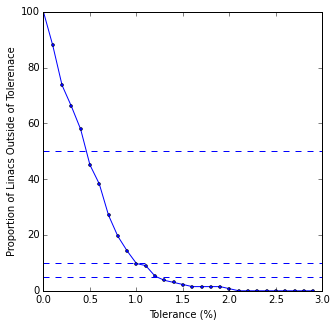

In [374]:
## how many linacs outside of 2%?

#perc_tol = [3.0, 2.5, 2.0, 1.75, 1.5, 1.0, 0.75, 0.5]
perc_tol = np.arange(0,3,0.1)
perc_tol_results= np.empty(0)
for x in perc_tol:
    lmean_oot = lmean[(lmean.OP_Dif > x) | (lmean.OP_Dif < -x)]
    no_oot = len(lmean_oot)
    perc_tol_results = np.append(perc_tol_results, no_oot)
    #print('No. Linacs outside ' + str(x) + '% : ' + str(no_oot))

#lmean_oot2 = lmean[(lmean.OP_Dif > 2) | (lmean.OP_Dif < -2)]
#lmean_oot1 = lmean[(lmean.OP_Dif > 1) | (lmean.OP_Dif < -1)]

#no_oot2 = len(lmean_oot2)
#no_oot1 = len(lmean_oot1)

#print('No. Linacs > +/-2%: ' + str(no_oot2))
#print('No. Linacs > +/-1%: ' + str(no_oot1))

#print(perc_tol_results)

plt.plot(perc_tol,(perc_tol_results/len(lmean)*100), marker='o', markersize=3)
plt.axhline(50, ls='--')
plt.axhline(10, ls='--')
plt.axhline(5, ls='--')
plt.xlabel('Tolerance (%)')
plt.ylabel('Proportion of Linacs Outside of Tolerenace')

(0, 9.0)

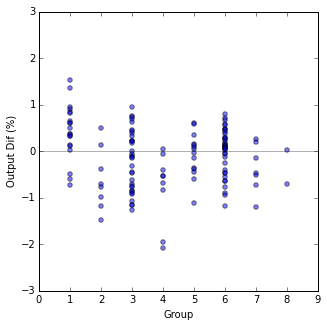

In [341]:
## Difference centres - no difference between centres seen.

plt.scatter(lmean['Group'],lmean['OP_Dif'], alpha=0.5)
plt.xlabel('Group')
plt.axhline(0, color='black', alpha=0.3)
plt.ylim(-3,3)
plt.ylabel('Output Dif (%)')
plt.xlim(0,)


(0, 30.0)

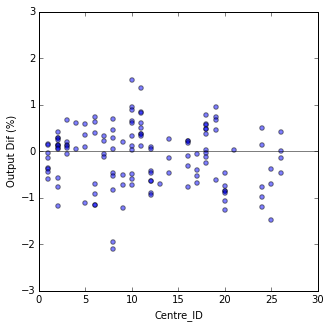

In [264]:
plt.scatter(lmean['Centre_ID'],lmean['OP_Dif'], alpha=0.5)
plt.xlabel('Centre_ID')
plt.axhline(0, color='black', alpha=0.5)
plt.ylim(-3,3)
plt.ylabel('Output Dif (%)')
plt.xlim(0,)

###What is maximum variation within centres

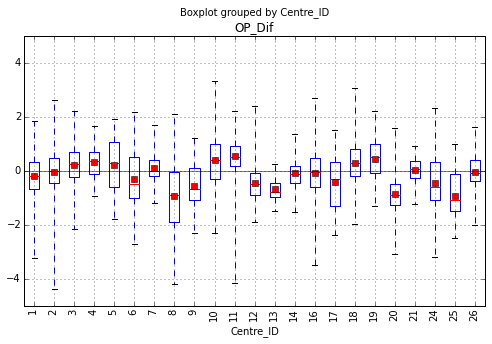

In [375]:
centre = m
centre_box = centre.boxplot(column=['OP_Dif'],by='Centre_ID', whis='range', showmeans='True', rot=90, figsize=(8,5))
centre_box.set_ylim(-5,5)
centre_box.axhline(0, alpha = 0.5, color = 'black')


Mean Max: 1.53699386503
Mean Min: -2.09007092199
Mean Range: 3.62706478702


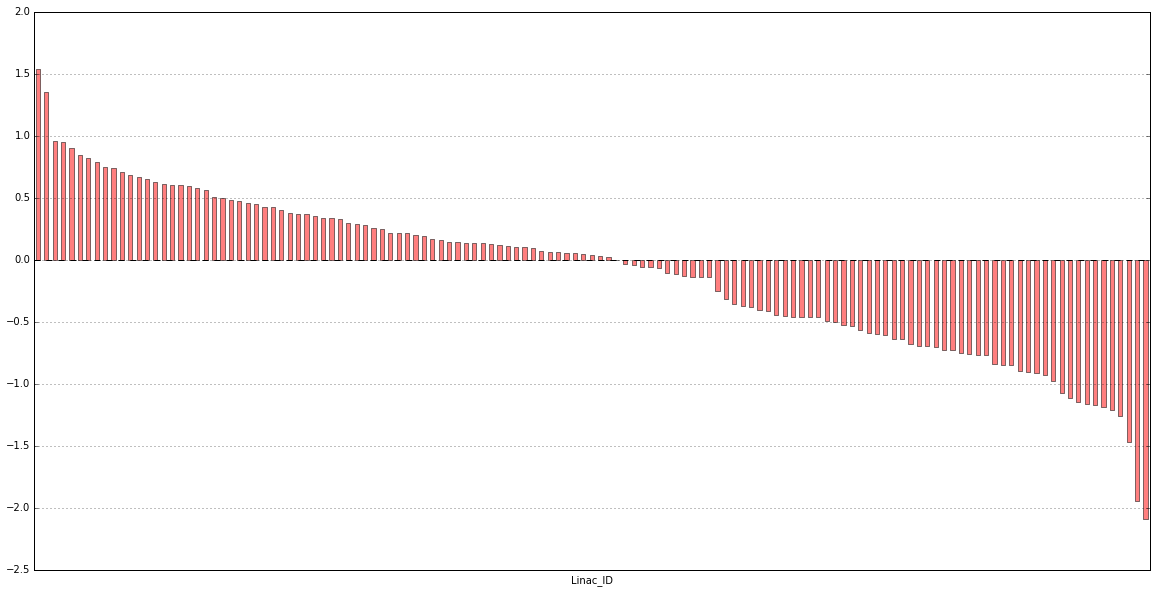

In [381]:
plt.figure(figsize=(20,10))
#plt.rcParams.update({'font.size': 22})
l = m.groupby('Linac_ID')
## calc mean for each linac
lmean = l.mean()
## sort into order
lmean = lmean.sort(['OP_Dif'], ascending=False)
lsd=l.std()
lsd = lsd.sort(['OP_Dif'], ascending=False)
lsdneg=-lsd
lsdnorm=lmean+lsd # to ensure SD is centred around mean
lsdnegnorm=lmean-lsd
myplotlinac = lmean['OP_Dif'].plot(kind='bar', color='red', alpha = 0.5)
#myplotlinac = lsd['OP_Dif'].plot(kind='bar', color='red', alpha = 0.5)

myplotlinac.axes.get_xaxis().set_ticks([])

mean_max = max(lmean['OP_Dif'])
mean_min = min(lmean['OP_Dif'])
mean_range = mean_max - mean_min
print('Mean Max: ' + str(mean_max))
print('Mean Min: ' + str(mean_min))
print('Mean Range: ' + str(mean_range))

#print(lsd.mean())

#plt.savefig('OPs/All_Linacs_Means-bar-corr-large_text.png', bbox_inches='tight', dpi=300)

1. Find mean of each linac
2. Box plot - Group by centre ID
3. Normal plot of Mean vs Centre ID

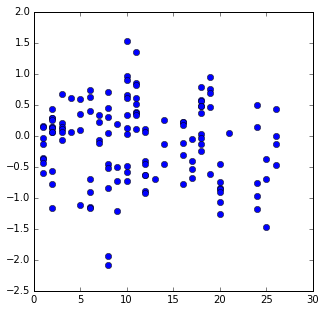

In [389]:
plt.plot(lmean['Centre_ID'], lmean['OP_Dif'], marker='o', ls='None')
lmean.groupby(lmean['Centre_ID'])

Max Range of Means in a single centre = 2.79595327493 %


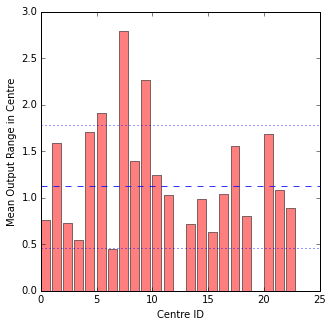

In [740]:
lmean2 = m.groupby(['Centre_ID','Linac_ID'],  as_index=True)
#lmean2g=lmean2.agg([np.mean, np.max, np.min, len]) #can calc multiple things on the grouped data

## means of all linacs for each centre
lmeang = lmean2['OP_Dif'].agg([np.mean])

## calcualte maximum and minimum within the Centre_ID groups
lmeang_max = lmeang.max(level='Centre_ID')
lmeang_min = lmeang.min(level='Centre_ID')

## calc range form min and max
lmeang_range = lmeang_max-lmeang_min

## mean and sd of all Centre means
mean_mean = np.mean(lmeang_range['mean'])
mean_sd = np.std(lmeang_range['mean'])

## print(lmeang_range)
print('Max Range of Means in a single centre = '+ str(max(lmeang_range['mean'])) + ' %')

## plot all centres ranges with mean of means and sd
plt.bar(range(len(lmeang_range)), lmeang_range['mean'], color='red', alpha=0.5)
plt.xlabel('Centre ID')
plt.ylabel('Mean Output Range in Centre')
plt.axhline(mean_mean, ls='--', alpha=0.8)
plt.axhline(mean_mean+mean_sd, ls=':', alpha=0.8)
plt.axhline(mean_mean-mean_sd, ls=':', alpha=0.8)



 ####So Far the maximum range is in Centre 7.
 - Need to find a way fo getting this value out automatically